The images were extracted from screenshots of the flight simulator part of the game Warthunder, a wW2-cold war era vehical game ranging from arcade physics to full realism simulator modes.

The screenshots were then annotated using the utility labelImg: https://github.com/tzutalin/labelImg

An object detection ai was used to find the aircraft for classification in the images:
https://github.com/zzh8829/yolov3-tf2

Yolo can be used stand alone, but in this case, it is only being used to find the aircraft

# imports and defines

In [1]:
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import re
import os
import gc

mpl.rcParams['figure.figsize'] = [12, 12]
mpl.rcParams['figure.dpi'] = 72

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
batchSize = 32
data_dir = "2classDataset/"
img_height = 224
img_width = 224
img_size = (img_height, img_width)

# setup data - YOLO

creates training and validation tfrecord files out of the annotations and images

In [22]:
!python yolov3-tf2/tools/voc2012.py --classes ./yolov3-tf2/data/names --data_dir ./yoloVOCDataset/VOCdata/ --split train --output_file yoloTrain.tfrecord

2020-11-22 19:22:58.095358: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cudart64_101.dll
I1122 19:22:59.653373 13532 voc2012.py:92] Class mapping loaded: {'plane': 0, 'notplane': 1}
I1122 19:22:59.674760 13532 voc2012.py:97] Image list loaded: 328

100%|##########| 328/328 [00:01<00:00, 271.76it/s]
I1122 19:23:01.589336 13532 voc2012.py:106] Done


In [23]:
!python yolov3-tf2/tools/voc2012.py --classes ./data/yolo.names --data_dir ./yoloVOCDataset/VOCdata/ --split val --output_file yoloVal.tfrecord

2020-11-22 19:23:23.826681: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cudart64_101.dll
I1122 19:23:25.456665  5224 voc2012.py:92] Class mapping loaded: {'plane': 0, 'notplane': 1}
I1122 19:23:25.469667  5224 voc2012.py:97] Image list loaded: 211

100%|##########| 211/211 [00:00<00:00, 301.49it/s]
I1122 19:23:26.626599  5224 voc2012.py:106] Done


In [24]:
!python ./yolov3-tf2/tools/visualize_dataset.py --classes ./data/yolo.names --dataset yoloTrain.tfrecord --size 832 --output visualize_dataset.jpg

2020-11-22 19:23:41.496343: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cudart64_101.dll
I1122 19:23:43.182150 11112 visualize_dataset.py:22] classes loaded
2020-11-22 19:23:43.183774: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library nvcuda.dll
2020-11-22 19:23:43.216769: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.68GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2020-11-22 19:23:43.216811: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cudart64_101.dll
2020-11-22 19:23:43.218962: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cublas64_10.dll
2020-11-22 19:23:43.220825: I tensorflow/stream_executor/platform/default/dso_

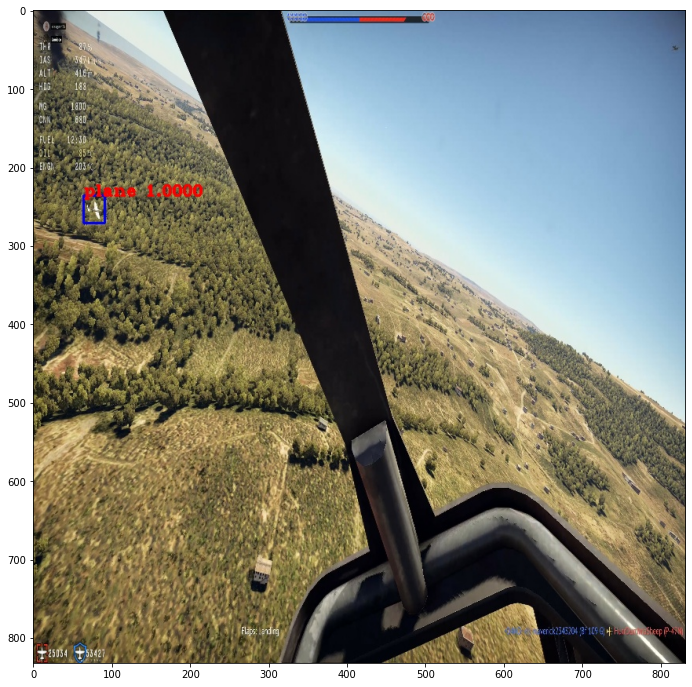

In [6]:
plt.figure()
plt.imshow(mpimg.imread('visualize_dataset.jpg'))
plt.show()

# setup data - classifier

extracts images from bounding box of annotated images

In [11]:
!python.exe .\bboxDataset.py --data_dir ./classifierVOCDataset/VOCdata --split train --output_dir ./classifierDataset

I1125 08:45:25.800176 21476 bboxDataset.py:78] Image list loaded: 565

100%|##########| 565/565 [00:19<00:00, 28.50it/s]
I1125 08:45:45.634911 21476 bboxDataset.py:85] Done


reclassify everything into twin or single engined categories

In [17]:
import glob
import shutil

dest_dir = './2classDataset/'
src_dir = './classifierDataset/'
twin = ['a26', 'b25', 'p38', 'p61']
single = ['bf109', 'cobra', 'f4u', 'f6f', 'fw190', 'p47', 'p51', 'spit', 'typhoon']

os.mkdir(dest_dir)
os.mkdir(dest_dir+'twinEngine')
os.mkdir(dest_dir+'singleEngine')

print("twins:")
for p in twin:
    for f in glob.glob(src_dir+p+'/*'):
        print(f)
        shutil.copy(f, dest_dir+"twinEngine/")

print("singles")
for p in single:
    for f in glob.glob(src_dir+p+'/*'):
        print(f)
        shutil.copy(f, dest_dir+"singleEngine/")

twins:
./classifierDataset/a26\set03-shot0011_0.jpg
./classifierDataset/a26\set03-shot0012_0.jpg
./classifierDataset/a26\set03-shot0013_0.jpg
./classifierDataset/a26\set05-shot0012_0.jpg
./classifierDataset/a26\set07-shot0001_0.jpg
./classifierDataset/a26\set07-shot0002_0.jpg
./classifierDataset/a26\set07-shot0003_0.jpg
./classifierDataset/a26\set09-shot0001_0.jpg
./classifierDataset/b25\set01-shot0025_0.jpg
./classifierDataset/b25\set01-shot0026_0.jpg
./classifierDataset/b25\set01-shot0026_1.jpg
./classifierDataset/b25\set01-shot0026_2.jpg
./classifierDataset/b25\set01-shot0026_3.jpg
./classifierDataset/b25\set01-shot0028_0.jpg
./classifierDataset/b25\set01-shot0029_0.jpg
./classifierDataset/b25\set01-shot0029_1.jpg
./classifierDataset/b25\set01-shot0029_2.jpg
./classifierDataset/b25\set02-shot0012_0.jpg
./classifierDataset/b25\set02-shot0013_0.jpg
./classifierDataset/b25\set02-shot0088_0.jpg
./classifierDataset/b25\set02-shot0089_0.jpg
./classifierDataset/b25\set03-shot0053_0.jpg
./c

./classifierDataset/f4u\set03-shot0070_0.jpg
./classifierDataset/f4u\set03-shot0073_0.jpg
./classifierDataset/f4u\set03-shot0074_0.jpg
./classifierDataset/f4u\set03-shot0075_0.jpg
./classifierDataset/f4u\set03-shot0076_0.jpg
./classifierDataset/f4u\set03-shot0078_0.jpg
./classifierDataset/f4u\set03-shot0089_0.jpg
./classifierDataset/f4u\set03-shot0091_0.jpg
./classifierDataset/f4u\set03-shot0092_0.jpg
./classifierDataset/f4u\set03-shot0095_0.jpg
./classifierDataset/f4u\set04-shot0001_0.jpg
./classifierDataset/f4u\set04-shot0002_0.jpg
./classifierDataset/f4u\set05-shot0004_0.jpg
./classifierDataset/f4u\set06-shot0011_0.jpg
./classifierDataset/f4u\set06-shot0012_0.jpg
./classifierDataset/f4u\set06-shot0013_0.jpg
./classifierDataset/f4u\set06-shot0014_0.jpg
./classifierDataset/f4u\set09-shot0015_0.jpg
./classifierDataset/f4u\set09-shot0016_0.jpg
./classifierDataset/f4u\set09-shot0021_0.jpg
./classifierDataset/f4u\set09-shot0022_0.jpg
./classifierDataset/f4u\set09-shot0027_0.jpg
./classifi

./classifierDataset/spit\set01-shot0039_0.jpg
./classifierDataset/spit\set01-shot0043_0.jpg
./classifierDataset/spit\set01-shot0045_0.jpg
./classifierDataset/spit\set02-shot0065_0.jpg
./classifierDataset/spit\set02-shot0066_0.jpg
./classifierDataset/spit\set02-shot0068_0.jpg
./classifierDataset/spit\set04-shot0005_0.jpg
./classifierDataset/spit\set04-shot0006_0.jpg
./classifierDataset/spit\set05-shot0005_0.jpg
./classifierDataset/spit\set05-shot0006_0.jpg
./classifierDataset/spit\set05-shot0007_0.jpg
./classifierDataset/spit\set05-shot0010_0.jpg
./classifierDataset/spit\set06-shot0009_0.jpg
./classifierDataset/spit\set09-shot0002_0.jpg
./classifierDataset/spit\set09-shot0003_0.jpg
./classifierDataset/spit\set09-shot0004_0.jpg
./classifierDataset/spit\set09-shot0006_0.jpg
./classifierDataset/spit\set09-shot0007_0.jpg
./classifierDataset/spit\set09-shot0008_0.jpg
./classifierDataset/spit\set09-shot0013_0.jpg
./classifierDataset/spit\set09-shot0014_0.jpg
./classifierDataset/spit\set10-sho

# Training - YOLO

In [8]:
#%run ./yolov3-tf2/train.py --epochs 16 --size 832 --batch_size 1 --mode fit \
#--classes ./data/yolo.names --num_classes 2 --weights ./yolov3-tf2/data/yolov3.tf --weights_num_classes 80 --dataset ./yoloTrain.tfrecord --val_dataset ./yoloVal.tfrecord

following code is copied from the yolo source code file train.py, and modified to run within the jupyter notebook, the only things added are the loss graphs

In [1]:
from absl import app, flags, logging
from absl.flags import FLAGS

import tensorflow as tf
import numpy as np
import cv2
from tensorflow.keras.callbacks import (
    ReduceLROnPlateau,
    EarlyStopping,
    ModelCheckpoint,
    TensorBoard
)
from yolov3_tf2.models import (
    YoloV3, YoloV3Tiny, YoloLoss,
    yolo_anchors, yolo_anchor_masks,
    yolo_tiny_anchors, yolo_tiny_anchor_masks
)
from yolov3_tf2.utils import freeze_all
import yolov3_tf2.dataset as dataset

flags.DEFINE_string('dataset', './yoloTrain.tfrecord', 'path to dataset')
flags.DEFINE_string('val_dataset', './yoloVal.tfrecord', 'path to validation dataset')
flags.DEFINE_boolean('tiny', False, 'yolov3 or yolov3-tiny')
flags.DEFINE_string('weights', './yolov3-tf2/data/yolov3.tf',
                    'path to weights file')
flags.DEFINE_string('classes', './data/yolo.names', 'path to classes file')
flags.DEFINE_enum('mode', 'fit', ['fit', 'eager_fit', 'eager_tf'],
                  'fit: model.fit, '
                  'eager_fit: model.fit(run_eagerly=True), '
                  'eager_tf: custom GradientTape')
flags.DEFINE_enum('transfer', 'darknet',
                  ['none', 'darknet', 'no_output', 'frozen', 'fine_tune'],
                  'none: Training from scratch, '
                  'darknet: Transfer darknet, '
                  'no_output: Transfer all but output, '
                  'frozen: Transfer and freeze all, '
                  'fine_tune: Transfer all and freeze darknet only')
flags.DEFINE_integer('size', 832, 'image size')
flags.DEFINE_integer('epochs', 10, 'number of epochs')
flags.DEFINE_integer('batch_size', 1, 'batch size')
flags.DEFINE_float('learning_rate', 1e-3, 'learning rate')
flags.DEFINE_integer('num_classes', 2, 'number of classes in the model')
flags.DEFINE_integer('weights_num_classes', 80, 'specify num class for `weights` file if different, '
                     'useful in transfer learning with different number of classes')

flags.FLAGS([""])

['']

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
for physical_device in physical_devices:
    tf.config.experimental.set_memory_growth(physical_device, True)

In [3]:
if FLAGS.tiny:
    model = YoloV3Tiny(FLAGS.size, training=True,
                       classes=FLAGS.num_classes)
    anchors = yolo_tiny_anchors
    anchor_masks = yolo_tiny_anchor_masks
else:
    model = YoloV3(FLAGS.size, training=True, classes=FLAGS.num_classes)
    anchors = yolo_anchors
    anchor_masks = yolo_anchor_masks

if FLAGS.dataset:
    train_dataset = dataset.load_tfrecord_dataset(
        FLAGS.dataset, FLAGS.classes, FLAGS.size)
else:
    train_dataset = dataset.load_fake_dataset()
train_dataset = train_dataset.shuffle(buffer_size=512)
train_dataset = train_dataset.batch(FLAGS.batch_size)
train_dataset = train_dataset.map(lambda x, y: (
    dataset.transform_images(x, FLAGS.size),
    dataset.transform_targets(y, anchors, anchor_masks, FLAGS.size)))
train_dataset = train_dataset.prefetch(
    buffer_size=tf.data.experimental.AUTOTUNE)

if FLAGS.val_dataset:
    val_dataset = dataset.load_tfrecord_dataset(
        FLAGS.val_dataset, FLAGS.classes, FLAGS.size)
else:
    val_dataset = dataset.load_fake_dataset()
val_dataset = val_dataset.batch(FLAGS.batch_size)
val_dataset = val_dataset.map(lambda x, y: (
    dataset.transform_images(x, FLAGS.size),
    dataset.transform_targets(y, anchors, anchor_masks, FLAGS.size)))

# Configure the model for transfer learning
if FLAGS.transfer == 'none':
    pass  # Nothing to do
elif FLAGS.transfer in ['darknet', 'no_output']:
    # Darknet transfer is a special case that works
    # with incompatible number of classes

    # reset top layers
    if FLAGS.tiny:
        model_pretrained = YoloV3Tiny(
            FLAGS.size, training=True, classes=FLAGS.weights_num_classes or FLAGS.num_classes)
    else:
        model_pretrained = YoloV3(
            FLAGS.size, training=True, classes=FLAGS.weights_num_classes or FLAGS.num_classes)
    model_pretrained.load_weights(FLAGS.weights)

    if FLAGS.transfer == 'darknet':
        model.get_layer('yolo_darknet').set_weights(
            model_pretrained.get_layer('yolo_darknet').get_weights())
        freeze_all(model.get_layer('yolo_darknet'))

    elif FLAGS.transfer == 'no_output':
        for l in model.layers:
            if not l.name.startswith('yolo_output'):
                l.set_weights(model_pretrained.get_layer(
                    l.name).get_weights())
                freeze_all(l)

else:
    # All other transfer require matching classes
    model.load_weights(FLAGS.weights)
    if FLAGS.transfer == 'fine_tune':
        # freeze darknet and fine tune other layers
        darknet = model.get_layer('yolo_darknet')
        freeze_all(darknet)
    elif FLAGS.transfer == 'frozen':
        # freeze everything
        freeze_all(model)

optimizer = tf.keras.optimizers.Adam(lr=FLAGS.learning_rate)
loss = [YoloLoss(anchors[mask], classes=FLAGS.num_classes)
        for mask in anchor_masks]

if FLAGS.mode == 'eager_tf':
    # Eager mode is great for debugging
    # Non eager graph mode is recommended for real training
    avg_loss = tf.keras.metrics.Mean('loss', dtype=tf.float32)
    avg_val_loss = tf.keras.metrics.Mean('val_loss', dtype=tf.float32)

    for epoch in range(1, FLAGS.epochs + 1):
        for batch, (images, labels) in enumerate(train_dataset):
            with tf.GradientTape() as tape:
                outputs = model(images, training=True)
                regularization_loss = tf.reduce_sum(model.losses)
                pred_loss = []
                for output, label, loss_fn in zip(outputs, labels, loss):
                    pred_loss.append(loss_fn(label, output))
                total_loss = tf.reduce_sum(pred_loss) + regularization_loss

            grads = tape.gradient(total_loss, model.trainable_variables)
            optimizer.apply_gradients(
                zip(grads, model.trainable_variables))

            print("{}_train_{}, {}, {}".format(
                epoch, batch, total_loss.numpy(),
                list(map(lambda x: np.sum(x.numpy()), pred_loss))))
            avg_loss.update_state(total_loss)

        for batch, (images, labels) in enumerate(val_dataset):
            outputs = model(images)
            regularization_loss = tf.reduce_sum(model.losses)
            pred_loss = []
            for output, label, loss_fn in zip(outputs, labels, loss):
                pred_loss.append(loss_fn(label, output))
            total_loss = tf.reduce_sum(pred_loss) + regularization_loss

            print("{}_val_{}, {}, {}".format(
                epoch, batch, total_loss.numpy(),
                list(map(lambda x: np.sum(x.numpy()), pred_loss))))
            avg_val_loss.update_state(total_loss)

        print("{}, train: {}, val: {}".format(
            epoch,
            avg_loss.result().numpy(),
            avg_val_loss.result().numpy()))

        avg_loss.reset_states()
        avg_val_loss.reset_states()
        model.save_weights(
            'checkpoints/yolov3_train_{}.tf'.format(epoch))
else:
    model.compile(optimizer=optimizer, loss=loss,
                  run_eagerly=(FLAGS.mode == 'eager_fit'))

    callbacks = [
        ReduceLROnPlateau(verbose=1),
        EarlyStopping(patience=3, verbose=1),
        ModelCheckpoint('checkpoints/yolov3_train_{epoch}.tf',
                        verbose=1, save_weights_only=True),
        TensorBoard(log_dir='logs')
    ]

    history = model.fit(train_dataset,
                        epochs=FLAGS.epochs,
                        callbacks=callbacks,
                        validation_data=val_dataset)

Epoch 1/10
Instructions for updating:
Use fn_output_signature instead
      1/Unknown - 0s 0s/step - loss: 29236.5078 - yolo_output_0_loss: 1665.7214 - yolo_output_1_loss: 5502.1807 - yolo_output_2_loss: 22058.0234WARNING:tensorflow:From c:\users\poi\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
      2/Unknown - 0s 133ms/step - loss: 33269.2148 - yolo_output_0_loss: 3005.5908 - yolo_output_1_loss: 6365.7695 - yolo_output_2_loss: 23887.2695WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0920s vs `on_train_batch_end` time: 0.1728s). Check your callbacks.
    328/Unknown - 40s 123ms/step - loss: 1188.1331 - yolo_output_0_loss: 80.1733 - yolo_output_1_loss: 191.5773 - yolo_output_2_loss: 905.4766
Epoch 00001:

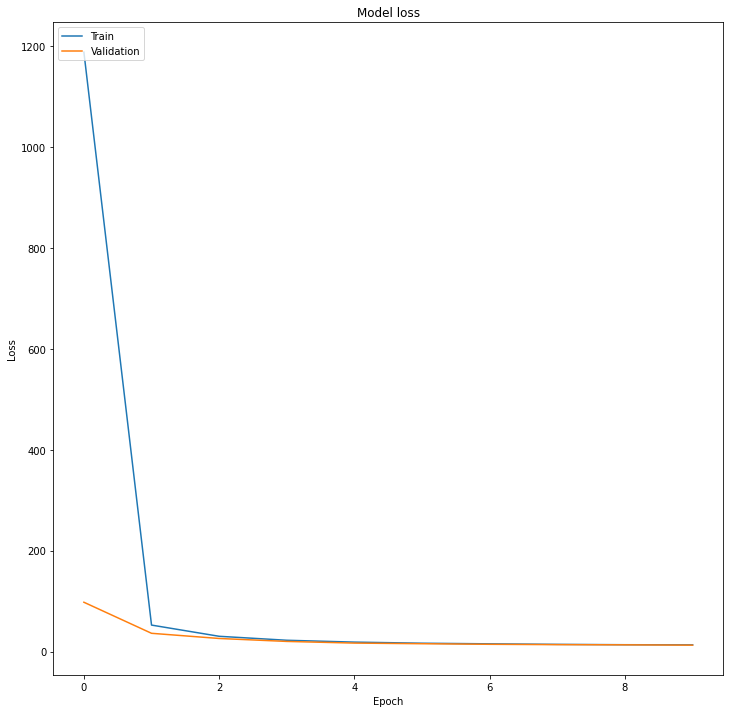

In [7]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [8]:
CHECKPOINT = ""
f = open("checkpoints/checkpoint")
r = re.compile("yolov3_train_.\d\.tf")
for l in f.readlines():
    if re.search("model_checkpoint_path", l):
        m = r.search(l)
        if(m != None):
            CHECKPOINT = m.group(0)
f.close()

!python ./yolov3-tf2/detect.py  --tfrecord ./yoloVal.tfrecord \
--yolo_iou_threshold 0.5 --yolo_score_threshold 0.3 \
--classes ./data/yolo.names --num_classes 2 --size 832 --weights ./checkpoints/{CHECKPOINT} \
--output detectVal.jpg

2020-11-22 20:24:12.508717: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cudart64_101.dll
2020-11-22 20:24:14.093409: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library nvcuda.dll
2020-11-22 20:24:14.125113: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.68GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2020-11-22 20:24:14.125152: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cudart64_101.dll
2020-11-22 20:24:14.127502: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cublas64_10.dll
2020-11-22 20:24:14.129485: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cufft64_10.dll
202

I1122 20:24:27.865834 15440 detect.py:59] 	plane, 0.5022200345993042, [0.37093154 0.624858   0.40039495 0.6597545 ]
I1122 20:24:27.895841 15440 detect.py:66] output saved to: detectVal.jpg


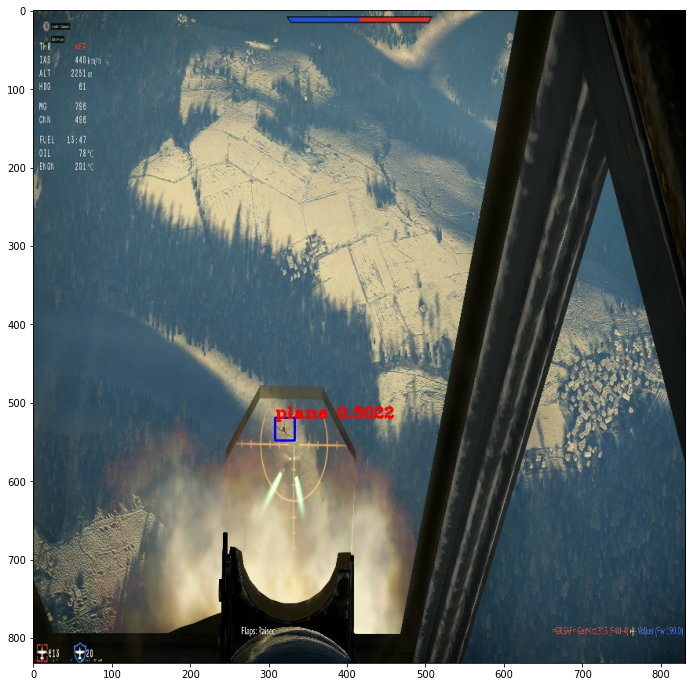

In [9]:
plt.figure()
plt.imshow(mpimg.imread('detectVal.jpg'))
plt.show()

## Some harder to detect image tests

In [42]:
CHECKPOINT = ""
f = open("checkpoints/checkpoint")
r = re.compile("yolov3_train_.\d\.tf")
for l in f.readlines():
    if re.search("model_checkpoint_path", l):
        m = r.search(l)
        if(m != None):
            CHECKPOINT = m.group(0)
f.close()

!python .\yolov3-tf2\detect.py --weights ./checkpoints/{CHECKPOINT} \
--yolo_iou_threshold 0.5 --yolo_score_threshold 0.3 \
--num_classes 2 --classes ./data/yolo.names --size 832 \
--image ./testImages/set02-shot0086.jpg \
--output detectHard1.jpg

2020-11-22 20:42:32.981988: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cudart64_101.dll
2020-11-22 20:42:34.596719: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library nvcuda.dll
2020-11-22 20:42:34.628952: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.68GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2020-11-22 20:42:34.628979: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cudart64_101.dll
2020-11-22 20:42:34.631164: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cublas64_10.dll
2020-11-22 20:42:34.633157: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cufft64_10.dll
202

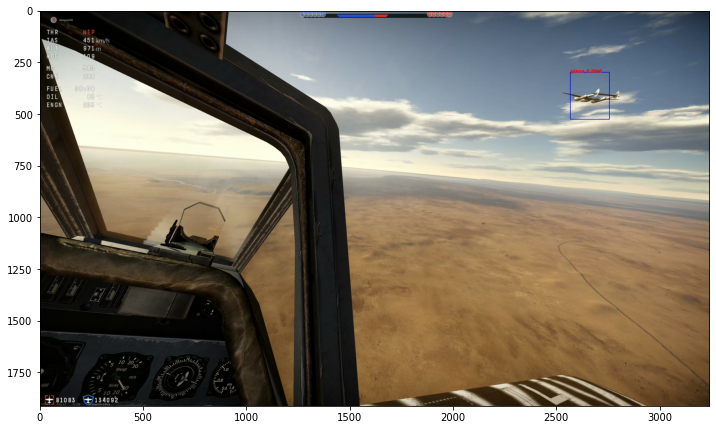

In [14]:
plt.figure()
plt.imshow(mpimg.imread('detectHard1.jpg'))
plt.show()

In [15]:
CHECKPOINT = ""
f = open("checkpoints/checkpoint")
r = re.compile("yolov3_train_.\d\.tf")
for l in f.readlines():
    if re.search("model_checkpoint_path", l):
        m = r.search(l)
        if(m != None):
            CHECKPOINT = m.group(0)
f.close()

!python .\yolov3-tf2\detect.py --weights ./checkpoints/{CHECKPOINT} \
--yolo_iou_threshold 0.5 --yolo_score_threshold 0.3 \
--num_classes 2 --classes ./data/yolo.names --size 832 \
--image ./testImages/set02-shot0040.jpg \
--output detectHard2.jpg

2020-11-22 20:34:12.982413: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cudart64_101.dll
2020-11-22 20:34:14.454359: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library nvcuda.dll
2020-11-22 20:34:14.483311: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.68GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2020-11-22 20:34:14.483339: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cudart64_101.dll
2020-11-22 20:34:14.485440: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cublas64_10.dll
2020-11-22 20:34:14.487324: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cufft64_10.dll
202

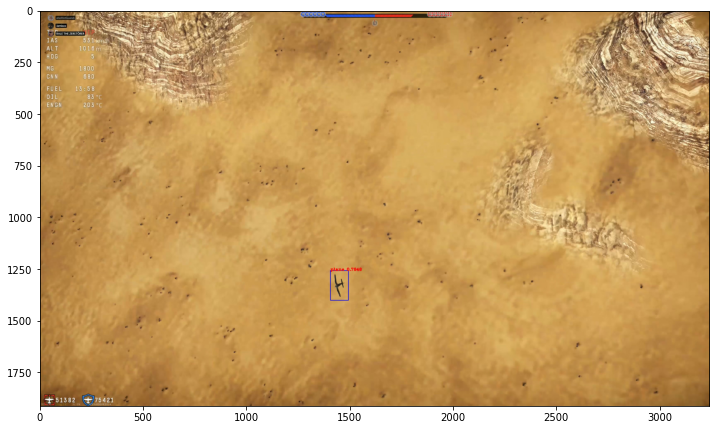

In [16]:
plt.figure()
plt.imshow(mpimg.imread('detectHard2.jpg'))
plt.show()

In [17]:
CHECKPOINT = ""
f = open("checkpoints/checkpoint")
r = re.compile("yolov3_train_.\d\.tf")
for l in f.readlines():
    if re.search("model_checkpoint_path", l):
        m = r.search(l)
        if(m != None):
            CHECKPOINT = m.group(0)
f.close()

!python .\yolov3-tf2\detect.py --weights ./checkpoints/{CHECKPOINT} \
--yolo_iou_threshold 0.5 --yolo_score_threshold 0.3 \
--num_classes 2 --classes ./data/yolo.names --size 832 \
--image ./testImages/set01-shot0051.jpg \
--output detectHard3.jpg

2020-11-22 20:34:30.900616: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cudart64_101.dll
2020-11-22 20:34:32.369446: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library nvcuda.dll
2020-11-22 20:34:32.400421: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.68GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2020-11-22 20:34:32.400448: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cudart64_101.dll
2020-11-22 20:34:32.402546: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cublas64_10.dll
2020-11-22 20:34:32.404395: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cufft64_10.dll
202

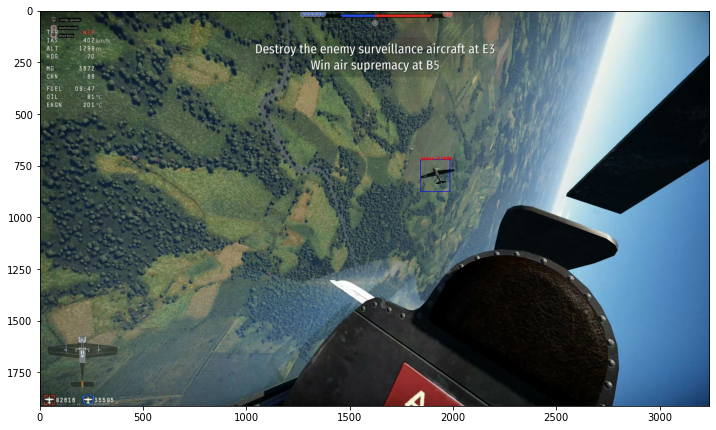

In [18]:
plt.figure()
plt.imshow(mpimg.imread('detectHard3.jpg'))
plt.show()

In [19]:
CHECKPOINT = ""
f = open("checkpoints/checkpoint")
r = re.compile("yolov3_train_.\d\.tf")
for l in f.readlines():
    if re.search("model_checkpoint_path", l):
        m = r.search(l)
        if(m != None):
            CHECKPOINT = m.group(0)
f.close()

!python .\yolov3-tf2\detect.py --weights ./checkpoints/{CHECKPOINT} \
--yolo_iou_threshold 0.5 --yolo_score_threshold 0.4 \
--num_classes 2 --classes ./data/yolo.names --size 832 \
--image ./testImages/set02-shot0011.jpg \
--output detectHard4.jpg

2020-11-22 20:34:50.741855: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cudart64_101.dll
2020-11-22 20:34:52.215014: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library nvcuda.dll
2020-11-22 20:34:52.246478: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.68GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2020-11-22 20:34:52.246506: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cudart64_101.dll
2020-11-22 20:34:52.248872: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cublas64_10.dll
2020-11-22 20:34:52.250828: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cufft64_10.dll
202

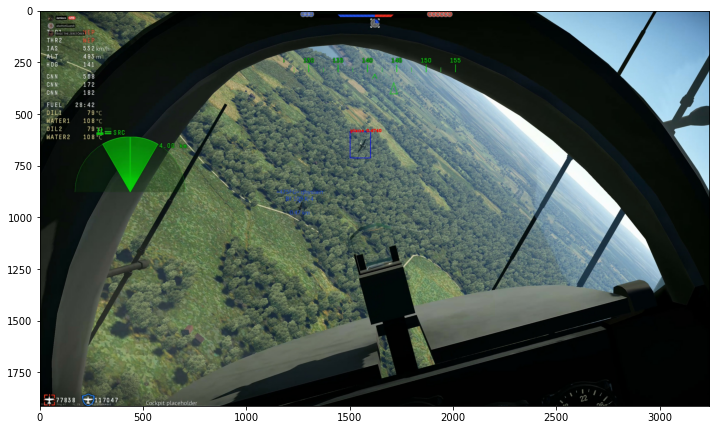

In [20]:
plt.figure()
plt.imshow(mpimg.imread('detectHard4.jpg'))
plt.show()

example too high iou threshold, causes bounding box overlap

In [22]:
CHECKPOINT = ""
f = open("checkpoints/checkpoint")
r = re.compile("yolov3_train_.\d\.tf")
for l in f.readlines():
    if re.search("model_checkpoint_path", l):
        m = r.search(l)
        if(m != None):
            CHECKPOINT = m.group(0)
f.close()

!python .\yolov3-tf2\detect.py --weights ./checkpoints/{CHECKPOINT} \
--yolo_iou_threshold 0.9 --yolo_score_threshold 0.3 \
--num_classes 2 --classes ./yolov3-tf2/data/names --size 832 \
--image ./testImages/set03-shot0019.jpg \
--output iou_high.jpg

2020-11-22 20:35:16.490243: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cudart64_101.dll
2020-11-22 20:35:17.957000: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library nvcuda.dll
2020-11-22 20:35:17.986911: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.68GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2020-11-22 20:35:17.986937: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cudart64_101.dll
2020-11-22 20:35:17.988986: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cublas64_10.dll
2020-11-22 20:35:17.990820: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cufft64_10.dll
202

2020-11-22 20:35:23.552074: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cudart64_101.dll
2020-11-22 20:35:25.232612: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library nvcuda.dll
2020-11-22 20:35:25.273784: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.68GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2020-11-22 20:35:25.273814: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cudart64_101.dll
2020-11-22 20:35:25.276138: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cublas64_10.dll
2020-11-22 20:35:25.278284: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cufft64_10.dll
202

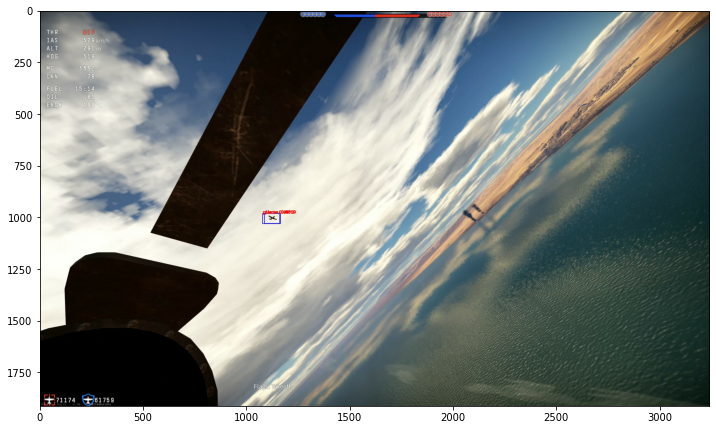

In [23]:
plt.figure()
plt.imshow(mpimg.imread('iou_high.jpg'))
plt.show()

# PLANE CLASSIFIER:

# Load and optimize the dataset

In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
for physical_device in physical_devices:
    tf.config.experimental.set_memory_growth(physical_device, True)

In [4]:
train_set = tf.keras.preprocessing.image_dataset_from_directory(data_dir, validation_split=0.2, seed=69,
  subset="training", image_size=img_size, batch_size=batchSize, interpolation="lanczos5")

val_set = tf.keras.preprocessing.image_dataset_from_directory(data_dir, validation_split=0.2, seed=69,
  subset="validation", image_size=img_size, batch_size=batchSize, interpolation="lanczos5")

num_classes = len(train_set.class_names)

Found 580 files belonging to 2 classes.
Using 464 files for training.
Found 580 files belonging to 2 classes.
Using 116 files for validation.


In [5]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_set.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_set.cache().prefetch(buffer_size=AUTOTUNE)

classes are very unbalanced, must use class weights

In [10]:
num_elements = 0
class_weights = {}
for f in [x[1] for x in os.walk(data_dir)][0]:
    path, dirs, files = next(os.walk(data_dir+f))
    class_weights[f] = len(files)
    num_elements = num_elements + len(files)

for k in class_weights.keys():
    class_weights[k] = num_elements / (num_classes*class_weights[k])

i = 0
index_weights = {}
for k in class_weights.keys():
    print(k, class_weights[k])
    index_weights[i] = class_weights[k]
    i = i + 1

singleEngine 0.6345733041575492
twinEngine 2.3577235772357725


# Build and train the model

## baseline

copied from some tensorflow tutorial https://www.tensorflow.org/tutorials/images/classification
I have no idea what I'm doing

In [71]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [72]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [73]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
random_flip_1 (RandomFlip)   (None, 224, 224, 3)       0         
_________________________________________________________________
random_rotation_1 (RandomRot (None, 224, 224, 3)       0         
_________________________________________________________________
random_zoom_1 (RandomZoom)   (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 32)     

In [74]:
epochs=20
history = model.fit(
  train_ds,
  shuffle=True,
  validation_data=val_ds,
  class_weight=index_weights,
  epochs=epochs
)

model.save("model")

Epoch 1/20
15/15 [==============================] - 1s 36ms/step - loss: 1.1548 - accuracy: 0.5280 - val_loss: 0.7044 - val_accuracy: 0.2328
Epoch 2/20
15/15 [==============================] - 0s 29ms/step - loss: 0.6874 - accuracy: 0.2091 - val_loss: 0.7004 - val_accuracy: 0.2414
Epoch 3/20
15/15 [==============================] - 0s 29ms/step - loss: 0.6884 - accuracy: 0.5065 - val_loss: 0.6914 - val_accuracy: 0.5431
Epoch 4/20
15/15 [==============================] - 0s 28ms/step - loss: 0.6891 - accuracy: 0.4763 - val_loss: 0.6846 - val_accuracy: 0.5948
Epoch 5/20
15/15 [==============================] - 0s 29ms/step - loss: 0.6860 - accuracy: 0.4526 - val_loss: 0.6941 - val_accuracy: 0.3879
Epoch 6/20
15/15 [==============================] - 0s 30ms/step - loss: 0.6884 - accuracy: 0.5000 - val_loss: 0.6679 - val_accuracy: 0.7931
Epoch 7/20
15/15 [==============================] - 0s 28ms/step - loss: 0.6800 - accuracy: 0.5776 - val_loss: 0.6885 - val_accuracy: 0.4828
Epoch 8/20
15

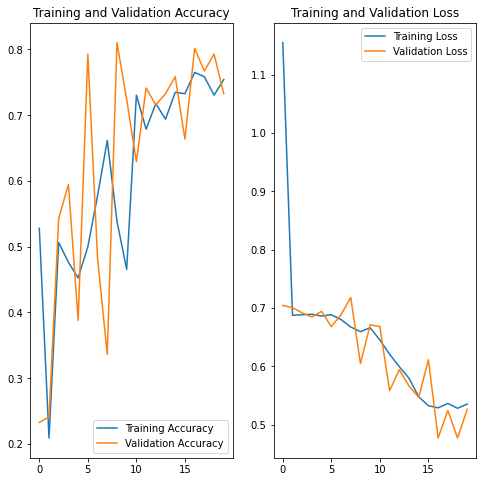

In [75]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## iteration 1

In [133]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.1),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.1),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [134]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [135]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_6 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
random_flip_6 (RandomFlip)   (None, 224, 224, 3)       0         
_________________________________________________________________
random_rotation_6 (RandomRot (None, 224, 224, 3)       0         
_________________________________________________________________
random_zoom_6 (RandomZoom)   (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 112, 112, 64)     

In [136]:
epochs=20
history = model.fit(
  train_ds,
  shuffle=True,
  validation_data=val_ds,
  class_weight=index_weights,
  epochs=epochs
)

model.save("model")

Epoch 1/20
15/15 [==============================] - 1s 54ms/step - loss: 0.7678 - accuracy: 0.4353 - val_loss: 0.6955 - val_accuracy: 0.2328
Epoch 2/20
15/15 [==============================] - 1s 48ms/step - loss: 0.6883 - accuracy: 0.4871 - val_loss: 0.6934 - val_accuracy: 0.3793
Epoch 3/20
15/15 [==============================] - 1s 46ms/step - loss: 0.6872 - accuracy: 0.2629 - val_loss: 0.6945 - val_accuracy: 0.2328
Epoch 4/20
15/15 [==============================] - 1s 46ms/step - loss: 0.6871 - accuracy: 0.2220 - val_loss: 0.6942 - val_accuracy: 0.2328
Epoch 5/20
15/15 [==============================] - 1s 46ms/step - loss: 0.6878 - accuracy: 0.4591 - val_loss: 0.6938 - val_accuracy: 0.3879
Epoch 6/20
15/15 [==============================] - 1s 46ms/step - loss: 0.6871 - accuracy: 0.2651 - val_loss: 0.6953 - val_accuracy: 0.2328
Epoch 7/20
15/15 [==============================] - 1s 46ms/step - loss: 0.6871 - accuracy: 0.2112 - val_loss: 0.6952 - val_accuracy: 0.2328
Epoch 8/20
15

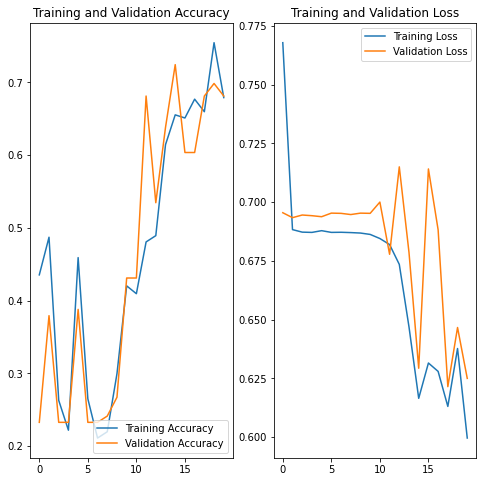

In [137]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## iteration 2

we want to improve model accuracy

from experimentation, downsizing the ai seems to yield similar results

we should always downsize if possible

In [254]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    
    layers.Conv2D(12, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(24, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.1),
    layers.Conv2D(24, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [255]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [256]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_30 (Rescaling)     (None, 224, 224, 3)       0         
_________________________________________________________________
random_flip_30 (RandomFlip)  (None, 224, 224, 3)       0         
_________________________________________________________________
random_rotation_30 (RandomRo (None, 224, 224, 3)       0         
_________________________________________________________________
random_zoom_30 (RandomZoom)  (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 224, 224, 12)      336       
_________________________________________________________________
max_pooling2d_88 (MaxPooling (None, 112, 112, 12)      0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 112, 112, 24)    

In [257]:
epochs=30
history = model.fit(
  train_ds,
  shuffle=True,
  validation_data=val_ds,
  class_weight=index_weights,
  epochs=epochs
)

model.save("model")

Epoch 1/30
15/15 [==============================] - 0s 33ms/step - loss: 0.7462 - accuracy: 0.4246 - val_loss: 0.7098 - val_accuracy: 0.2931
Epoch 2/30
15/15 [==============================] - 0s 26ms/step - loss: 0.6870 - accuracy: 0.6185 - val_loss: 0.6822 - val_accuracy: 0.7586
Epoch 3/30
15/15 [==============================] - 0s 28ms/step - loss: 0.6849 - accuracy: 0.5043 - val_loss: 0.6962 - val_accuracy: 0.3966
Epoch 4/30
15/15 [==============================] - 0s 24ms/step - loss: 0.6839 - accuracy: 0.4591 - val_loss: 0.6874 - val_accuracy: 0.6207
Epoch 5/30
15/15 [==============================] - 0s 26ms/step - loss: 0.6826 - accuracy: 0.5733 - val_loss: 0.6886 - val_accuracy: 0.5603
Epoch 6/30
15/15 [==============================] - 0s 24ms/step - loss: 0.6775 - accuracy: 0.5625 - val_loss: 0.7007 - val_accuracy: 0.4914
Epoch 7/30
15/15 [==============================] - 0s 26ms/step - loss: 0.6769 - accuracy: 0.4784 - val_loss: 0.6865 - val_accuracy: 0.6034
Epoch 8/30
15

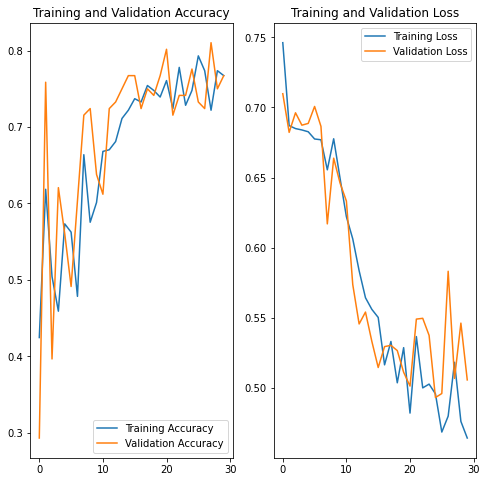

In [258]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## iteration 3

goal is to improve performance

try and fix overfitting

slightly increase model size to see if we can learn some additional features

if we increase it too much, this may lead to overfitting

In [7]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.4),
    layers.experimental.preprocessing.RandomContrast(0.2),
    layers.experimental.preprocessing.RandomZoom(0.1),
    
    layers.Conv2D(6, 7, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(12, 5, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(24, 5, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(48, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [8]:
#opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
random_flip (RandomFlip)     (None, 224, 224, 3)       0         
_________________________________________________________________
random_rotation (RandomRotat (None, 224, 224, 3)       0         
_________________________________________________________________
random_contrast (RandomContr (None, 224, 224, 3)       0         
_________________________________________________________________
random_zoom (RandomZoom)     (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 6)       888       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 6)       0

In [10]:
epochs=100
history = model.fit(
  train_ds,
  shuffle=True,
  validation_data=val_ds,
  class_weight=index_weights,
  epochs=epochs
)

model.save("model")

Epoch 1/100
15/15 [==============================] - 1s 87ms/step - loss: 0.7164 - accuracy: 0.5259 - val_loss: 0.6840 - val_accuracy: 0.7586
Epoch 2/100
15/15 [==============================] - 0s 29ms/step - loss: 0.6951 - accuracy: 0.3039 - val_loss: 0.6807 - val_accuracy: 0.7845
Epoch 3/100
15/15 [==============================] - 0s 29ms/step - loss: 0.6957 - accuracy: 0.2931 - val_loss: 0.7000 - val_accuracy: 0.2069
Epoch 4/100
15/15 [==============================] - 0s 29ms/step - loss: 0.6937 - accuracy: 0.2198 - val_loss: 0.6910 - val_accuracy: 0.6810
Epoch 5/100
15/15 [==============================] - 0s 29ms/step - loss: 0.6937 - accuracy: 0.3233 - val_loss: 0.6994 - val_accuracy: 0.2586
Epoch 6/100
15/15 [==============================] - 0s 29ms/step - loss: 0.6907 - accuracy: 0.2500 - val_loss: 0.6932 - val_accuracy: 0.5259
Epoch 7/100
15/15 [==============================] - 0s 29ms/step - loss: 0.6858 - accuracy: 0.5237 - val_loss: 0.6222 - val_accuracy: 0.8017
Epoch 

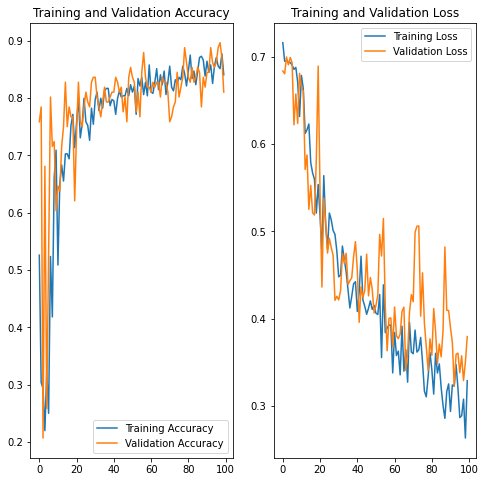

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## iteration 4

attempt to solve overfitting with regularizers

batch size was also adjusted to fix network getting stuck in local minima issues

In [246]:
batch_size = 128

In [247]:
train_set = tf.keras.preprocessing.image_dataset_from_directory(data_dir, validation_split=0.2, seed=69,
  subset="training", image_size=img_size, batch_size=batchSize, interpolation="lanczos5")

val_set = tf.keras.preprocessing.image_dataset_from_directory(data_dir, validation_split=0.2, seed=69,
  subset="validation", image_size=img_size, batch_size=batchSize, interpolation="lanczos5")

num_classes = len(train_set.class_names)

Found 580 files belonging to 2 classes.
Using 464 files for training.
Found 580 files belonging to 2 classes.
Using 116 files for validation.


In [248]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_set.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_set.cache().prefetch(buffer_size=AUTOTUNE)

In [338]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.4),
    layers.experimental.preprocessing.RandomContrast(0.2),
    layers.experimental.preprocessing.RandomZoom(0.1),
    
    layers.Conv2D(6, 7, padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-7), kernel_regularizer=tf.keras.regularizers.l1(1e-4)),
    layers.MaxPooling2D(),
    layers.Conv2D(12, 5, padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-7), kernel_regularizer=tf.keras.regularizers.l1(1e-4)),
    layers.MaxPooling2D(),
    layers.Conv2D(24, 5, padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-7), kernel_regularizer=tf.keras.regularizers.l1(1e-4)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-7), kernel_regularizer=tf.keras.regularizers.l1(1e-4)),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.1),
    layers.Dense(48, activation='relu', bias_regularizer=tf.keras.regularizers.l2(1e-4), kernel_regularizer=tf.keras.regularizers.l1(1e-4)),
    layers.Dense(num_classes, activation='softmax')
])

In [339]:
#opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [340]:
model.summary()

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_63 (Rescaling)     (None, 224, 224, 3)       0         
_________________________________________________________________
random_flip_63 (RandomFlip)  (None, 224, 224, 3)       0         
_________________________________________________________________
random_rotation_63 (RandomRo (None, 224, 224, 3)       0         
_________________________________________________________________
random_contrast_63 (RandomCo (None, 224, 224, 3)       0         
_________________________________________________________________
random_zoom_63 (RandomZoom)  (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_249 (Conv2D)          (None, 224, 224, 6)       888       
_________________________________________________________________
max_pooling2d_249 (MaxPoolin (None, 112, 112, 6)     

In [341]:
epochs=130
history = model.fit(
  train_ds,
  shuffle=True,
  validation_data=val_ds,
  class_weight=index_weights,
  epochs=epochs
)

model.save("model")

Epoch 1/130
15/15 [==============================] - 1s 43ms/step - loss: 1.1572 - accuracy: 0.5733 - val_loss: 1.0123 - val_accuracy: 0.8017
Epoch 2/130
15/15 [==============================] - 0s 33ms/step - loss: 0.9547 - accuracy: 0.3125 - val_loss: 0.9025 - val_accuracy: 0.2241
Epoch 3/130
15/15 [==============================] - 0s 32ms/step - loss: 0.8812 - accuracy: 0.2284 - val_loss: 0.8600 - val_accuracy: 0.2069
Epoch 4/130
15/15 [==============================] - 0s 32ms/step - loss: 0.8422 - accuracy: 0.2134 - val_loss: 0.8312 - val_accuracy: 0.2069
Epoch 5/130
15/15 [==============================] - 0s 33ms/step - loss: 0.8166 - accuracy: 0.2134 - val_loss: 0.8133 - val_accuracy: 0.2069
Epoch 6/130
15/15 [==============================] - 0s 33ms/step - loss: 0.7994 - accuracy: 0.2134 - val_loss: 0.7971 - val_accuracy: 0.2931
Epoch 7/130
15/15 [==============================] - 0s 33ms/step - loss: 0.7860 - accuracy: 0.3103 - val_loss: 0.7892 - val_accuracy: 0.3448
Epoch 

15/15 [==============================] - 0s 33ms/step - loss: 0.4497 - accuracy: 0.8427 - val_loss: 0.5337 - val_accuracy: 0.8362
Epoch 116/130
15/15 [==============================] - 0s 32ms/step - loss: 0.4576 - accuracy: 0.8319 - val_loss: 0.5958 - val_accuracy: 0.7500
Epoch 117/130
15/15 [==============================] - 0s 33ms/step - loss: 0.4274 - accuracy: 0.8793 - val_loss: 0.6372 - val_accuracy: 0.7500
Epoch 118/130
15/15 [==============================] - 1s 33ms/step - loss: 0.4336 - accuracy: 0.8642 - val_loss: 0.6946 - val_accuracy: 0.7241
Epoch 119/130
15/15 [==============================] - 0s 32ms/step - loss: 0.3878 - accuracy: 0.8793 - val_loss: 0.4695 - val_accuracy: 0.8621
Epoch 120/130
15/15 [==============================] - 0s 33ms/step - loss: 0.4395 - accuracy: 0.8384 - val_loss: 0.5123 - val_accuracy: 0.8190
Epoch 121/130
15/15 [==============================] - 0s 32ms/step - loss: 0.3789 - accuracy: 0.8815 - val_loss: 0.5968 - val_accuracy: 0.7672
Epoch 

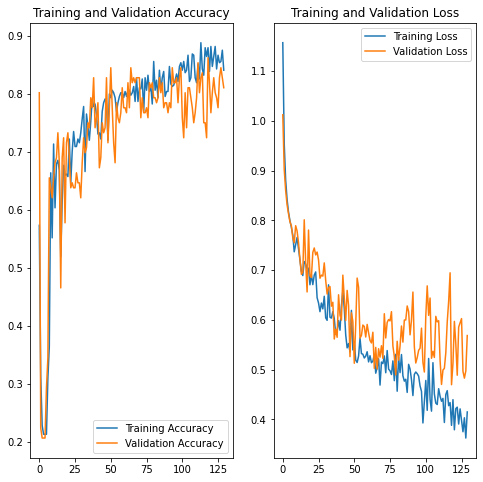

In [342]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## iteration 5

tune the hyperparameters to achieve a good result

stop at 100 epochs, more than that results in overfitting

In [12]:
batch_size = 148

In [13]:
train_set = tf.keras.preprocessing.image_dataset_from_directory(data_dir, validation_split=0.2, seed=69,
  subset="training", image_size=img_size, batch_size=batchSize, interpolation="lanczos5")

val_set = tf.keras.preprocessing.image_dataset_from_directory(data_dir, validation_split=0.2, seed=69,
  subset="validation", image_size=img_size, batch_size=batchSize, interpolation="lanczos5")

num_classes = len(train_set.class_names)

Found 580 files belonging to 2 classes.
Using 464 files for training.
Found 580 files belonging to 2 classes.
Using 116 files for validation.


In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_set.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_set.cache().prefetch(buffer_size=AUTOTUNE)

In [15]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.4),
    layers.experimental.preprocessing.RandomContrast(0.2),
    layers.experimental.preprocessing.RandomZoom(0.1),
    
    layers.Conv2D(6, 7, padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-7), kernel_regularizer=tf.keras.regularizers.l1(1e-3)),
    layers.MaxPooling2D(),
    layers.Conv2D(12, 7, padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-7), kernel_regularizer=tf.keras.regularizers.l1(1e-3)),
    layers.MaxPooling2D(),
    layers.Conv2D(24, 5, padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-7), kernel_regularizer=tf.keras.regularizers.l1(1e-3)),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.1),
    layers.Dense(64, activation='relu', bias_regularizer=tf.keras.regularizers.l2(1e-4), kernel_regularizer=tf.keras.regularizers.l1(1e-4)),
    layers.Dense(num_classes, activation='softmax')
])

In [16]:
#opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
random_flip_1 (RandomFlip)   (None, 224, 224, 3)       0         
_________________________________________________________________
random_rotation_1 (RandomRot (None, 224, 224, 3)       0         
_________________________________________________________________
random_contrast_1 (RandomCon (None, 224, 224, 3)       0         
_________________________________________________________________
random_zoom_1 (RandomZoom)   (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 224, 224, 6)       888       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 6)      

In [18]:
epochs=100

history = model.fit(
  train_ds,
  shuffle=True,
  validation_data=val_ds,
  class_weight=index_weights,
  epochs=epochs
)

model.save("model")

Epoch 1/100
15/15 [==============================] - 1s 84ms/step - loss: 2.2475 - accuracy: 0.4526 - val_loss: 1.7744 - val_accuracy: 0.2069
Epoch 2/100
15/15 [==============================] - 1s 34ms/step - loss: 1.6777 - accuracy: 0.2134 - val_loss: 1.5808 - val_accuracy: 0.2069
Epoch 3/100
15/15 [==============================] - 1s 34ms/step - loss: 1.5147 - accuracy: 0.2155 - val_loss: 1.4446 - val_accuracy: 0.2069
Epoch 4/100
15/15 [==============================] - 0s 33ms/step - loss: 1.3942 - accuracy: 0.2134 - val_loss: 1.3452 - val_accuracy: 0.2069
Epoch 5/100
15/15 [==============================] - 1s 34ms/step - loss: 1.3053 - accuracy: 0.2134 - val_loss: 1.2705 - val_accuracy: 0.2069
Epoch 6/100
15/15 [==============================] - 1s 34ms/step - loss: 1.2406 - accuracy: 0.2134 - val_loss: 1.2165 - val_accuracy: 0.2069
Epoch 7/100
15/15 [==============================] - 1s 34ms/step - loss: 1.1905 - accuracy: 0.2134 - val_loss: 1.1713 - val_accuracy: 0.2069
Epoch 

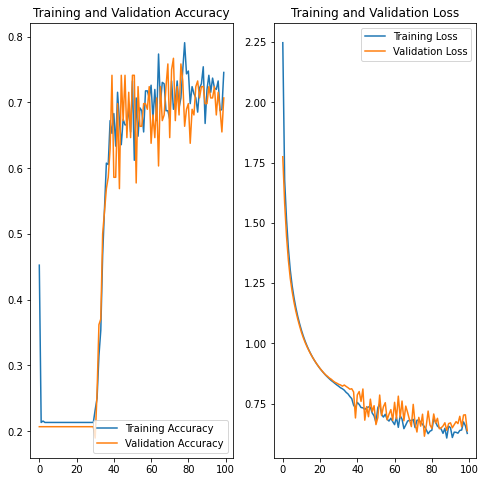

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## iteration 6

use early stopping

train slightly more complex network

tune regularizer values

tune batch size values

In [344]:
batch_size = 32

In [345]:
train_set = tf.keras.preprocessing.image_dataset_from_directory(data_dir, validation_split=0.2, seed=69,
  subset="training", image_size=img_size, batch_size=batchSize, interpolation="lanczos5")

val_set = tf.keras.preprocessing.image_dataset_from_directory(data_dir, validation_split=0.2, seed=69,
  subset="validation", image_size=img_size, batch_size=batchSize, interpolation="lanczos5")

num_classes = len(train_set.class_names)

Found 580 files belonging to 2 classes.
Using 464 files for training.
Found 580 files belonging to 2 classes.
Using 116 files for validation.


In [346]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_set.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_set.cache().prefetch(buffer_size=AUTOTUNE)

In [554]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.4),
    layers.experimental.preprocessing.RandomContrast(0.2),
    layers.experimental.preprocessing.RandomZoom(0.1),
    
    layers.Conv2D(8, 7, padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-24), kernel_regularizer=tf.keras.regularizers.l1(1e-24)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 5, padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-24), kernel_regularizer=tf.keras.regularizers.l1(1e-24)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 5, padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-20), kernel_regularizer=tf.keras.regularizers.l1(1e-20)),
    layers.MaxPooling2D(),
    layers.Conv2D(48, 3, padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-20), kernel_regularizer=tf.keras.regularizers.l1(1e-20)),
    layers.MaxPooling2D(),
    layers.Flatten(),
    #layers.Dropout(0.1),
    #layers.Dense(1024, activation='relu', bias_regularizer=tf.keras.regularizers.l2(1e-4), kernel_regularizer=tf.keras.regularizers.l1(1e-4)),
    layers.Dense(512, activation='relu', bias_regularizer=tf.keras.regularizers.l2(1e-4), kernel_regularizer=tf.keras.regularizers.l1(1e-4)),
    layers.Dense(num_classes, activation='softmax')
])

In [555]:
model.summary()

Model: "sequential_101"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_101 (Rescaling)    (None, 224, 224, 3)       0         
_________________________________________________________________
random_flip_101 (RandomFlip) (None, 224, 224, 3)       0         
_________________________________________________________________
random_rotation_101 (RandomR (None, 224, 224, 3)       0         
_________________________________________________________________
random_contrast_101 (RandomC (None, 224, 224, 3)       0         
_________________________________________________________________
random_zoom_101 (RandomZoom) (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_351 (Conv2D)          (None, 224, 224, 8)       1184      
_________________________________________________________________
max_pooling2d_351 (MaxPoolin (None, 112, 112, 8)    

In [556]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [557]:
epochs=100

history = model.fit(
  train_ds,
  shuffle=True,
  validation_data=val_ds,
  class_weight=index_weights,
  epochs=epochs,
  callbacks = [tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0.005, patience=20, verbose=0, mode='auto',
    baseline=None, restore_best_weights=True
    )]
)

model.save("model")

Epoch 1/100
15/15 [==============================] - 1s 51ms/step - loss: 4.8869 - accuracy: 0.4052 - val_loss: 3.0041 - val_accuracy: 0.7931
Epoch 2/100
15/15 [==============================] - 1s 40ms/step - loss: 2.3543 - accuracy: 0.3685 - val_loss: 1.8593 - val_accuracy: 0.7931
Epoch 3/100
15/15 [==============================] - 1s 39ms/step - loss: 1.5866 - accuracy: 0.6099 - val_loss: 1.3344 - val_accuracy: 0.4914
Epoch 4/100
15/15 [==============================] - 1s 39ms/step - loss: 1.2048 - accuracy: 0.2522 - val_loss: 1.0816 - val_accuracy: 0.2414
Epoch 5/100
15/15 [==============================] - 1s 39ms/step - loss: 1.0134 - accuracy: 0.2220 - val_loss: 0.9475 - val_accuracy: 0.2845
Epoch 6/100
15/15 [==============================] - 1s 39ms/step - loss: 0.9112 - accuracy: 0.2349 - val_loss: 0.8756 - val_accuracy: 0.2241
Epoch 7/100
15/15 [==============================] - 1s 40ms/step - loss: 0.8516 - accuracy: 0.2177 - val_loss: 0.8270 - val_accuracy: 0.6034
Epoch 

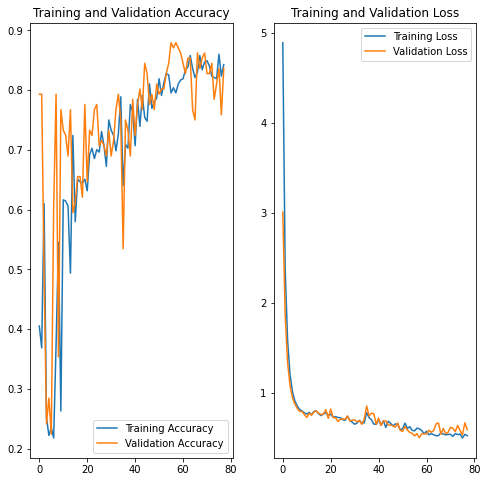

In [558]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['loss']))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Testing the classifier

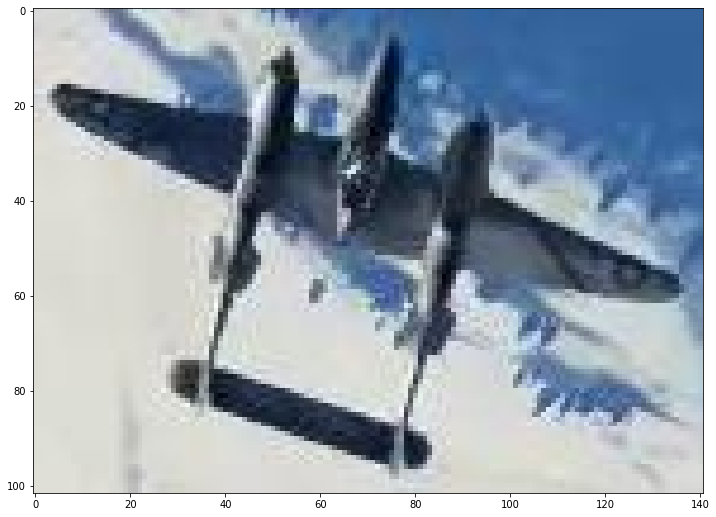

In [20]:
plt.figure()
plt.imshow(mpimg.imread('testImages/set01-shot0011_0.jpg'))
plt.show()

In [21]:
keras.backend.clear_session()
model = keras.models.load_model("model")

train_set = tf.keras.preprocessing.image_dataset_from_directory(data_dir, validation_split=0.2, seed=69,
  subset="training", image_size=img_size, batch_size=batchSize, interpolation="lanczos5")

img = keras.preprocessing.image.load_img(
    "testImages/set01-shot0011_0.jpg", target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(train_set.class_names[np.argmax(score)], 100 * np.max(score))
)

Found 580 files belonging to 2 classes.
Using 464 files for training.
This image most likely belongs to twinEngine with a 56.81 percent confidence.


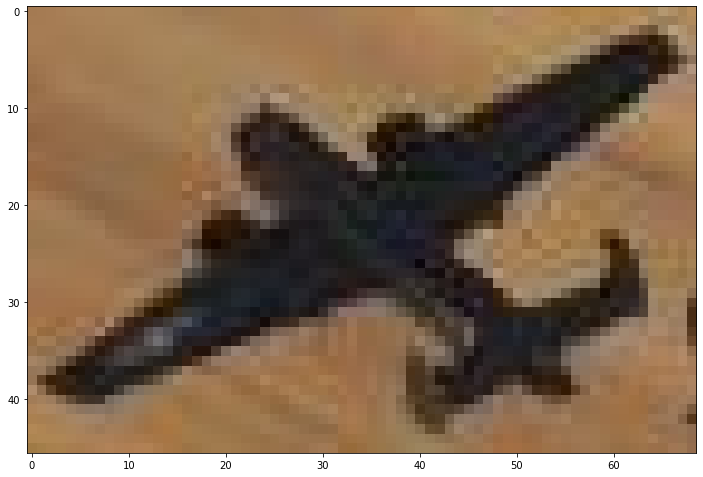

In [22]:
plt.figure()
plt.imshow(mpimg.imread('testImages/set01-shot0029_1.jpg'))
plt.show()

In [23]:
keras.backend.clear_session()
model = keras.models.load_model("model")

train_set = tf.keras.preprocessing.image_dataset_from_directory(data_dir, validation_split=0.2, seed=69,
  subset="training", image_size=img_size, batch_size=batchSize, interpolation="lanczos5")

img = keras.preprocessing.image.load_img(
    "testImages/set01-shot0029_1.jpg", target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(train_set.class_names[np.argmax(score)], 100 * np.max(score))
)

Found 580 files belonging to 2 classes.
Using 464 files for training.
This image most likely belongs to twinEngine with a 62.38 percent confidence.


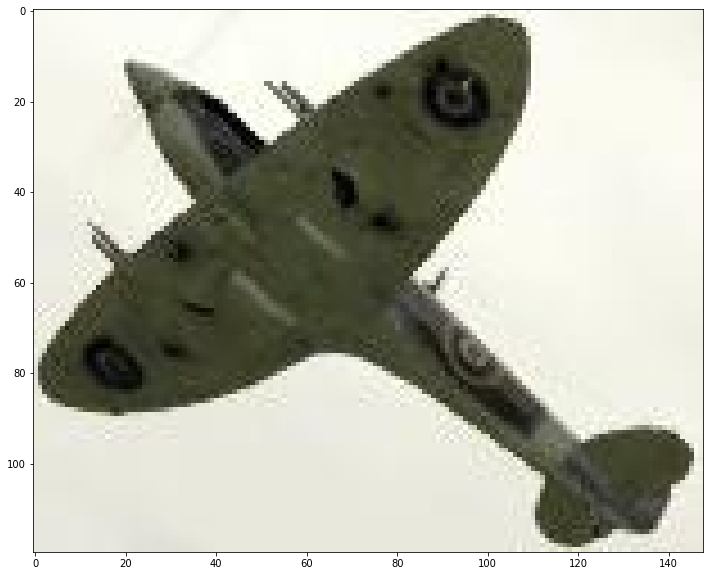

In [24]:
plt.figure()
plt.imshow(mpimg.imread('testImages/set09-shot0002_0.jpg'))
plt.show()

In [25]:
keras.backend.clear_session()
model = keras.models.load_model("model")

train_set = tf.keras.preprocessing.image_dataset_from_directory(data_dir, validation_split=0.2, seed=69,
  subset="training", image_size=img_size, batch_size=batchSize, interpolation="lanczos5")

img = keras.preprocessing.image.load_img(
    "testImages/set09-shot0002_0.jpg", target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(train_set.class_names[np.argmax(score)], 100 * np.max(score))
)

Found 580 files belonging to 2 classes.
Using 464 files for training.
This image most likely belongs to singleEngine with a 63.18 percent confidence.


# Cascading the yolo and the image classifier and running

In [26]:
CHECKPOINT = ""
f = open("checkpoints/checkpoint")
r = re.compile("yolov3_train_.\d\.tf")
for l in f.readlines():
    if re.search("model_checkpoint_path", l):
        m = r.search(l)
        if(m != None):
            CHECKPOINT = m.group(0)
f.close()

!python .\detectPlane.py --yolo_iou_threshold 0.4 --yolo_score_threshold 0.2 \
--weights ./checkpoints/{CHECKPOINT} --data_dir ./2classDataset \
--output detect2.jpg \
--image ./testimages/set02-shot0086.jpg

Found 580 files belonging to 2 classes.

2020-11-25 22:45:04.056456: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cudart64_101.dll
2020-11-25 22:45:05.775275: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library nvcuda.dll
2020-11-25 22:45:05.800409: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.68GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2020-11-25 22:45:05.800439: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cudart64_101.dll
2020-11-25 22:45:05.802918: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cublas64_10.dll
2020-11-25 22:45:05.805297: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cufft64_10.dll
202


Using 464 files for training.


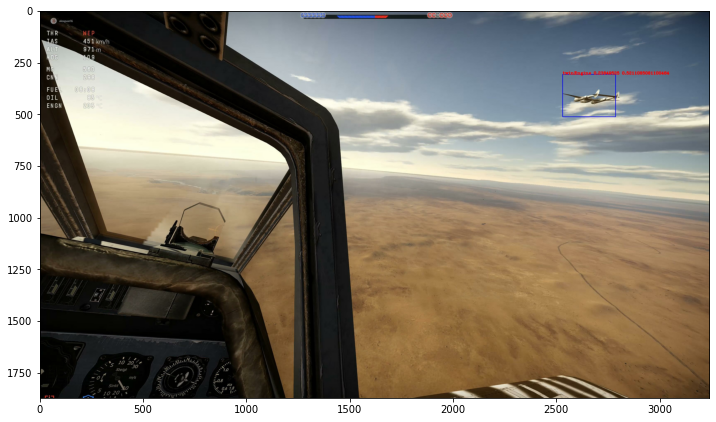

In [27]:
plt.figure()
plt.imshow(mpimg.imread('detect2.jpg'))
plt.show()

we attempt some fresh images not yet seen by either yolo, or the classifier AI

In [28]:
CHECKPOINT = ""
f = open("checkpoints/checkpoint")
r = re.compile("yolov3_train_.\d\.tf")
for l in f.readlines():
    if re.search("model_checkpoint_path", l):
        m = r.search(l)
        if(m != None):
            CHECKPOINT = m.group(0)
f.close()

!python .\detectPlane.py --yolo_iou_threshold 0.4 --yolo_score_threshold 0.2 \
--weights ./checkpoints/{CHECKPOINT} --data_dir ./2classDataset \
--output detect3.jpg \
--image ./testimages/mpv-shot0063.jpg

Found 580 files belonging to 2 classes.
Using 464 files for training.


2020-11-25 22:45:20.807675: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cudart64_101.dll
2020-11-25 22:45:22.419758: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library nvcuda.dll
2020-11-25 22:45:22.449288: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.68GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2020-11-25 22:45:22.449343: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cudart64_101.dll
2020-11-25 22:45:22.451962: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cublas64_10.dll
2020-11-25 22:45:22.454016: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cufft64_10.dll
202

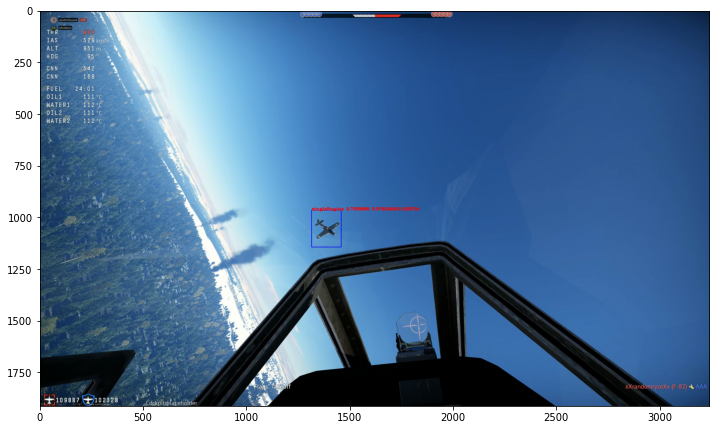

In [29]:
plt.figure()
plt.imshow(mpimg.imread('detect3.jpg'))
plt.show()

In [30]:
CHECKPOINT = ""
f = open("checkpoints/checkpoint")
r = re.compile("yolov3_train_.\d\.tf")
for l in f.readlines():
    if re.search("model_checkpoint_path", l):
        m = r.search(l)
        if(m != None):
            CHECKPOINT = m.group(0)
f.close()

!python .\detectPlane.py --yolo_iou_threshold 0.4 --yolo_score_threshold 0.7 \
--weights ./checkpoints/{CHECKPOINT} --data_dir ./2classDataset \
--output detect4.jpg \
--image ./testimages/mpv-shot0067.jpg

Found 580 files belonging to 2 classes.
Using 464 files for training.


2020-11-25 22:45:36.061121: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cudart64_101.dll
2020-11-25 22:45:37.652898: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library nvcuda.dll
2020-11-25 22:45:37.681271: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.68GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2020-11-25 22:45:37.681306: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cudart64_101.dll
2020-11-25 22:45:37.683808: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cublas64_10.dll
2020-11-25 22:45:37.686172: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cufft64_10.dll
202

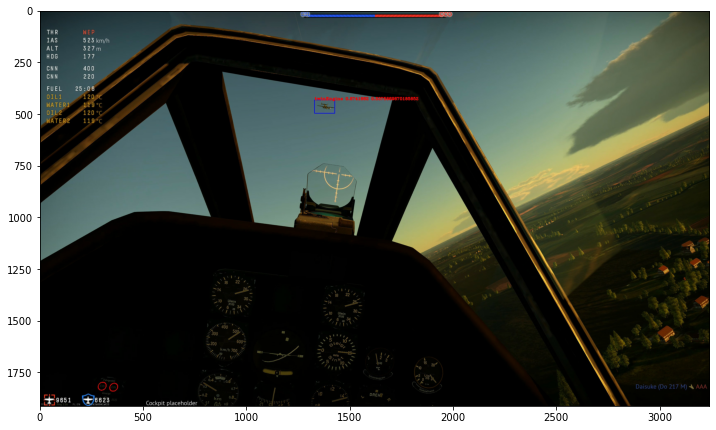

In [31]:
plt.figure()
plt.imshow(mpimg.imread('detect4.jpg'))
plt.show()

In [32]:
CHECKPOINT = ""
f = open("checkpoints/checkpoint")
r = re.compile("yolov3_train_.\d\.tf")
for l in f.readlines():
    if re.search("model_checkpoint_path", l):
        m = r.search(l)
        if(m != None):
            CHECKPOINT = m.group(0)
f.close()

!python .\detectPlane.py --yolo_iou_threshold 0.4 --yolo_score_threshold 0.2 \
--weights ./checkpoints/{CHECKPOINT} --data_dir ./2classDataset \
--output detect5.jpg \
--image ./testimages/mpv-shot0043.jpg

Found 580 files belonging to 2 classes.
Using 464 files for training.


2020-11-25 22:45:51.220180: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cudart64_101.dll
2020-11-25 22:45:52.838443: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library nvcuda.dll
2020-11-25 22:45:52.865540: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.68GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2020-11-25 22:45:52.865574: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cudart64_101.dll
2020-11-25 22:45:52.867951: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cublas64_10.dll
2020-11-25 22:45:52.870133: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cufft64_10.dll
202

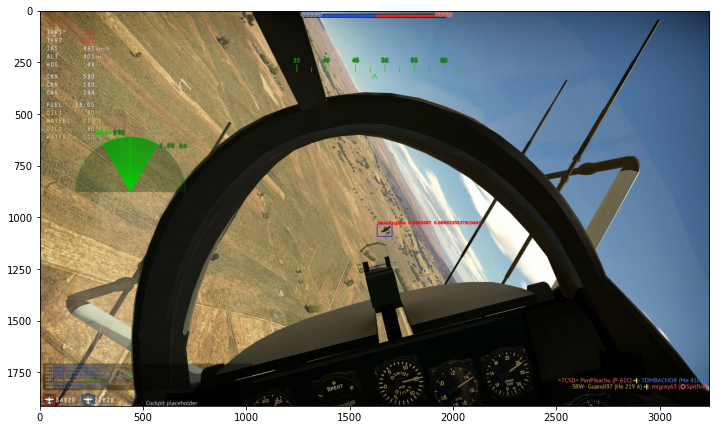

In [33]:
plt.figure()
plt.imshow(mpimg.imread('detect5.jpg'))
plt.show()